In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.6.0
sys.version_info(major=3, minor=9, micro=7, releaselevel='final', serial=0)
matplotlib 3.5.2
numpy 1.19.5
pandas 1.4.3
sklearn 1.1.1
tensorflow 2.6.0
keras.api._v2.keras 2.6.0


In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state = 7)
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state = 11)
print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

In [5]:
learning_rates=[1e-2,3e-2,3e-1]
histories=[]
for lr in learning_rates:
    model=keras.models.Sequential([
        keras.layers.Dense(30,activation='relu',
                          input_shape=x_train.shape[1:]),
        keras.layers.Dense(1),
    ])
    optimizer=keras.optimizers.SGD(lr)
    model.compile(loss="mean_squared_error", optimizer=optimizer)
    callbacks = [keras.callbacks.EarlyStopping(
        patience=5, min_delta=1e-2)]
    history = model.fit(x_train_scaled, y_train,
                        validation_data = (x_valid_scaled, y_valid),
                        epochs = 20,
                        callbacks = callbacks)
    histories.append(history)

Epoch 1/20
363/363 [==============================] - 0s 553us/step - loss: 1.2912 - val_loss: 0.5733
Epoch 2/20
363/363 [==============================] - 0s 381us/step - loss: 0.4585 - val_loss: 0.4274
Epoch 3/20
363/363 [==============================] - 0s 394us/step - loss: 0.4028 - val_loss: 0.4213
Epoch 4/20
363/363 [==============================] - 0s 409us/step - loss: 0.4047 - val_loss: 0.4104

Learning rate:  0.01
0.36182665824890137 0.38831764459609985


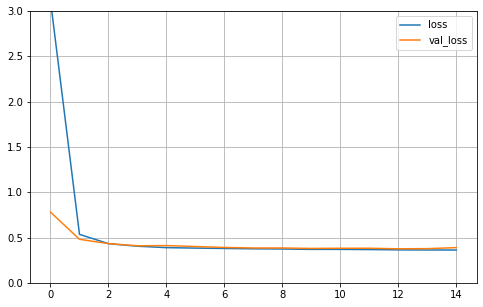

Learning rate:  0.03
nan nan


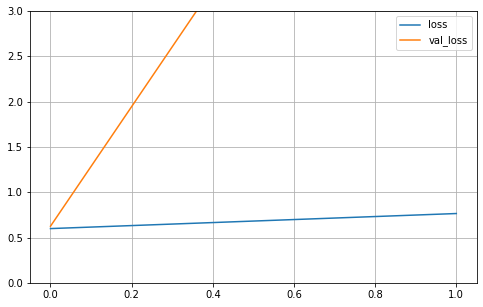

Learning rate:  0.3
nan nan


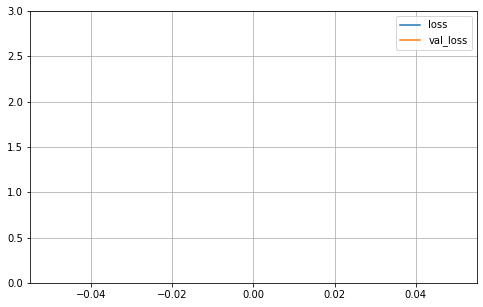

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
    plt.show()

#每一次训练的结果history都被保存到了histories列表中
for lr, history in zip(learning_rates, histories):
    print("Learning rate: ", lr)
    print(history.history['loss'][-1],history.history['val_loss'][-1])
    plot_learning_curves(history)

In [11]:
history.history

{'loss': [nan, nan, nan, nan, nan], 'val_loss': [nan, nan, nan, nan, nan]}